In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

import pickle

In [128]:
#reading from pickle
with open('final_df_new.pkl', 'rb') as f:
    df = pickle.load(f)

In [96]:
#writting to pickle
with open('final_df_new.pkl', "wb") as f:
    pickle.dump(df, f)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65871 entries, 0 to 65870
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          65871 non-null  object 
 1   album_name        65871 non-null  object 
 2   artists           65871 non-null  object 
 3   track_name        65871 non-null  object 
 4   release_date      65871 non-null  object 
 5   track_genre       65871 non-null  object 
 6   duration_ms       65871 non-null  int64  
 7   explicit          65871 non-null  bool   
 8   href              65871 non-null  object 
 9   danceability      65871 non-null  float64
 10  energy            65871 non-null  float64
 11  key               65871 non-null  int64  
 12  loudness          65871 non-null  float64
 13  mode              65871 non-null  int64  
 14  speechiness       65871 non-null  float64
 15  acousticness      65871 non-null  float64
 16  instrumentalness  65871 non-null  float6

In [99]:
#We know that preview_url has missing values, but that field won't be use for modelling only for presentation later
# Checking NaNs for all columns other than preview_url
df[['track_id', 'album_name', 'artists', 'track_name', 'release_date',
       'track_genre', 'duration_ms', 'explicit', 'href', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature','popularity']].isna().any().sum()

0

In [100]:
#Checking that all tracks are unique tracks
df.shape[0] == df['track_id'].nunique()

True

## Genre Analysis

In [74]:
#checking number of genres
df['track_genre'].nunique()

123

In [44]:
# the name of the genres
df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'bossanova',
       'brazil', 'breakbeat', 'british', 'cantopop', 'chicago-house',
       'children', 'chill', 'classical', 'club', 'comedy', 'country',
       'dance', 'dancehall', 'death-metal', 'deep-house',
       'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub',
       'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro',
       'french', 'funk', 'garage', 'german', 'gospel', 'goth',
       'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock',
       'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'holidays',
       'honky-tonk', 'house', 'idm', 'indian', 'indie', 'indie-pop',
       'industrial', 'iranian', 'j-dance', 'j-idol', 'j-pop', 'j-rock',
       'jazz', 'k-pop', 'kids', 'latin', 'latino', 'malay', 'mandopop',
       'metal', 'metalcore', 'minimal-techno', 'movies', 'mpb', 'new-age',
       'opera', 'pagode', 'party

  0%|          | 0/123 [00:00<?, ?it/s]

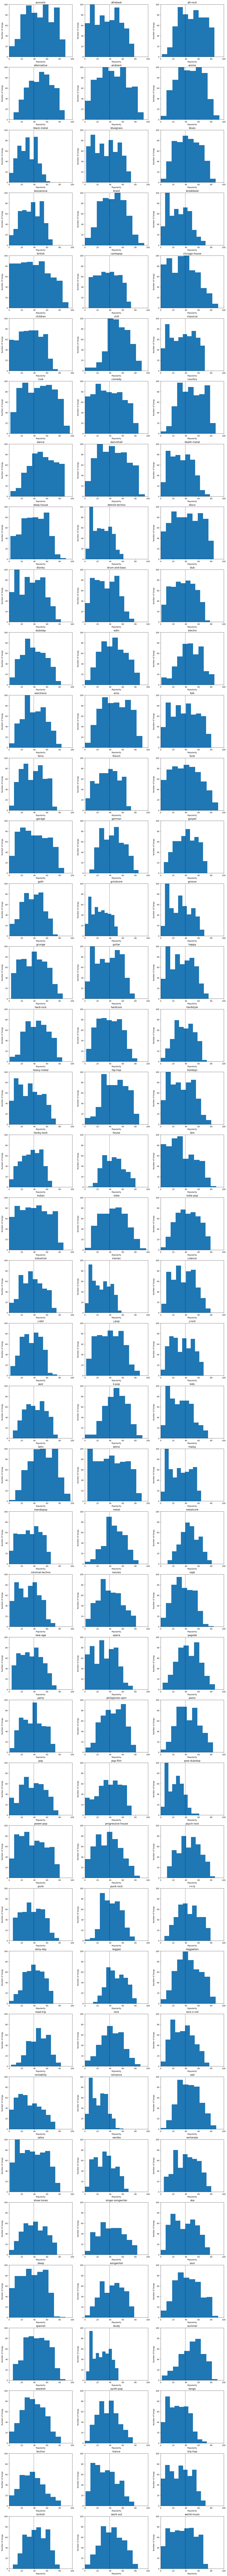

In [46]:
#plotting populairty distribtuion for each genre genre
plt.subplots(41,3,figsize=(20,240))

for x in tqdm(range(123)):
    plt.subplot(41,3,x+1)
    
   
    plt.hist(df[df['track_genre'] == df['track_genre'].unique()[x]]['popularity'], bins=10)
    plt.title(df['track_genre'].unique()[x],fontsize=13)
    plt.axvline(np.median(df['popularity']), linestyle='--', color='black', alpha=0.6)
    plt.xlabel('Popularity')
    plt.ylabel('Number of Songs')
    plt.xlim(0,100)
    plt.ylim(0,100)
    
plt.show()   

In [49]:
genre_counts = df.groupby('track_genre')['track_id'].count()

In [68]:
pd.DataFrame(genre_counts).describe().T

,count,mean,std,min,25%,50%,75%,max
track_id,123.0,535.536585,88.999566,341.0,477.5,524.0,590.5,740.0


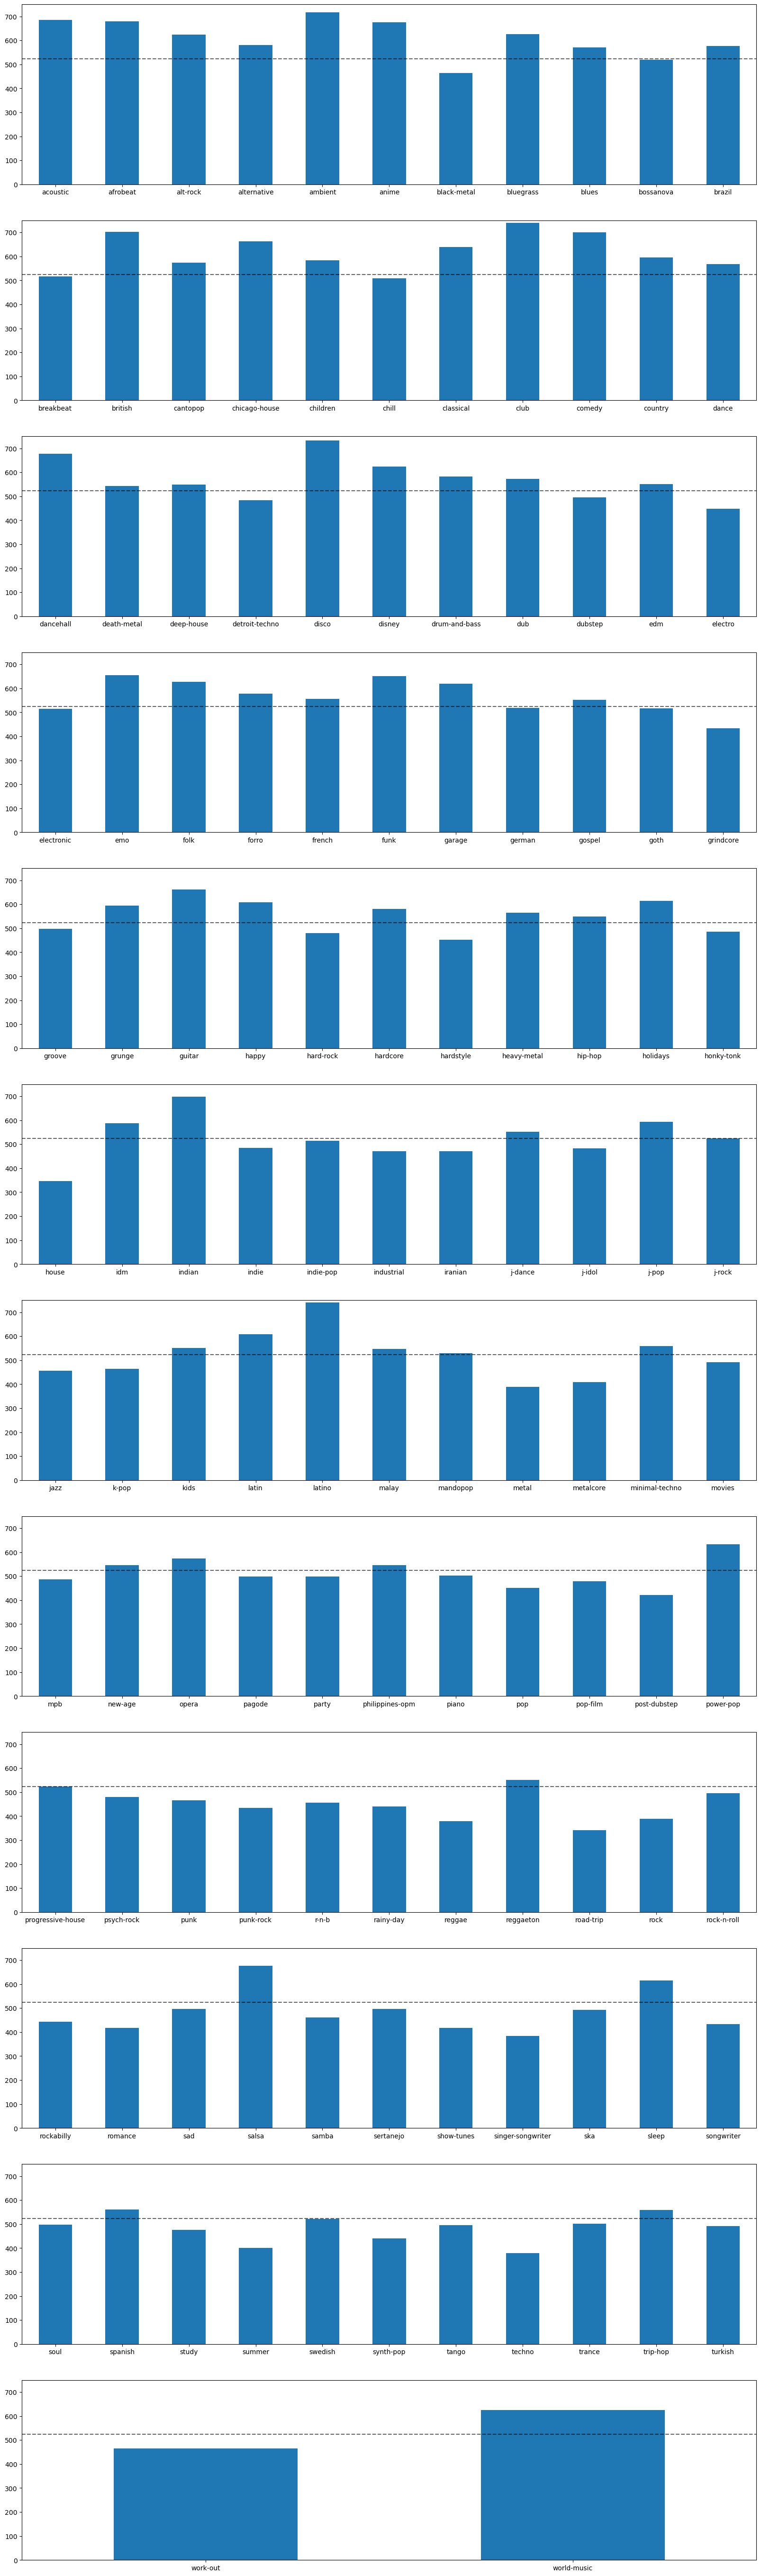

In [64]:
#plotting number of songs per genre
plt.subplots(12,1,figsize=(20,70))
for x in range(12):
    plt.subplot(12,1,x+1)
    if (11*(x+1)) > 123:
        genre_counts.iloc[11*x:].plot(kind='bar')
    else:
        genre_counts.iloc[11*x:11*(x+1)].plot(kind='bar')
    plt.axhline(np.median(genre_counts),linestyle='--', color='black', alpha=0.6)
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.ylim(0,750)
        
plt.show()

## Correlation

In [75]:
df.select_dtypes('number')

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
0,229226,0.380,0.339,3,-7.885,1,0.0338,0.691,0.000000,0.120,0.0849,100.607,4,85
452,248253,0.349,0.225,0,-10.705,1,0.0342,0.934,0.000016,0.111,0.2370,169.855,4,35
453,242173,0.489,0.176,7,-12.485,1,0.0346,0.868,0.000000,0.117,0.3800,137.590,4,30
454,240000,0.634,0.199,10,-16.097,1,0.0403,0.863,0.000086,0.287,0.1690,128.024,4,40
455,168250,0.542,0.470,2,-4.169,1,0.0289,0.597,0.000000,0.175,0.4810,119.842,4,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61525,204240,0.553,0.310,0,-15.048,1,0.0246,0.305,0.000005,0.105,0.3190,96.762,4,40
61526,193040,0.435,0.322,11,-8.871,1,0.0290,0.586,0.000000,0.121,0.2810,137.800,4,42
61527,279693,0.371,0.405,9,-8.005,1,0.0263,0.241,0.000000,0.117,0.2730,75.811,4,43
61520,124488,0.444,0.136,0,-19.216,1,0.0337,0.874,0.000015,0.152,0.3410,102.150,4,43


Text(0.5, 0, 'Popularity Score')

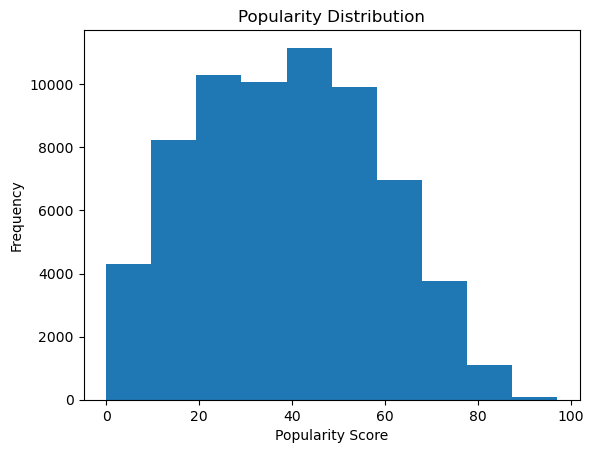

In [77]:
plt.figure()
plt.hist(df['popularity'],bins=10)
plt.title('Popularity Distribution')
plt.ylabel('Frequency')
plt.xlabel('Popularity Score')

In [78]:
# Making explicit column a binary column
df['explicit'] = np.where(df['explicit'], 1, 0)

In [79]:
#Circular encoding the Key column

# Define the circular encoding function
def circular_encode(value, max_value):
    sin_value = np.sin(2 * np.pi * value / max_value)
    cos_value = np.cos(2 * np.pi * value / max_value)
    return sin_value, cos_value

# Apply the function to the key column of your DataFrame
max_value = 11  # maximum value in the key column
df[['key_sin', 'key_cos']] = df['key'].apply(circular_encode, max_value=max_value).apply(pd.Series)
df.drop(columns='key',inplace=True)

In [126]:
l = []
for x in df['release_date']:
    if len(x) not in l:
        l.append(len(x))
        if len(x) == 10:
            print(x[8:])

21


In [121]:
i = 0
for x in df['release_date']:
    if len(x) == 4:
        i += 1

i

5437

In [138]:
date_d = {'year':[], 'month':[], 'day':[]}
missing_month = []
missing_day = []

In [139]:
for x in df['release_date']:
    if len(x) == 10:
        date_d['year'].append(x[:4])
        date_d['month'].append(x[5:7])
        date_d['day'].append(x[8:])
    elif len(x) == 7:
        date_d['year'].append(x[:4])
        date_d['month'].append(x[5:7])
        date_d['day'].append(np.nan)
    elif len(x) == 4:
        date_d['year'].append(x[:4])
        date_d['month'].append(np.nan)
        date_d['day'].append(np.nan)
        

In [140]:
df_w_date = pd.concat([df,pd.DataFrame(date_d)], axis=1)
df_w_date

,track_id,album_name,artists,track_name,release_date,track_genre,duration_ms,explicit,href,danceability,...,instrumentalness,liveness,valence,tempo,time_signature,preview_url,popularity,year,month,day
0,5CZ40GBx1sQ9agT82CLQCT,SOUR,Olivia Rodrigo,traitor,2021-05-21,acoustic,229226,False,https://api.spotify.com/v1/tracks/5CZ40GBx1sQ9...,0.380,...,0.000000,0.120,0.0849,100.607,4,None,85,2021,05,21
1,03V5hhD1z7CD41Dy4ZVthN,Even Here,JJ Heller,Even Here,2019-10-04,acoustic,248253,False,https://api.spotify.com/v1/tracks/03V5hhD1z7CD...,0.349,...,0.000016,0.111,0.2370,169.855,4,https://p.scdn.co/mp3-preview/19209115f0aa0b92...,35,2019,10,04
2,20aW5uLdlOuleBQ5RTcSQb,I'll Sing to You,Casey Breves,I'll Sing to You,2017-11-10,acoustic,242173,False,https://api.spotify.com/v1/tracks/20aW5uLdlOul...,0.489,...,0.000000,0.117,0.3800,137.590,4,https://p.scdn.co/mp3-preview/e7eda7988fbdecfd...,30,2017,11,10
3,66iAV4LVKYYoxVeYoC8M3s,I Fall Apart,Hayd,I Fall Apart,2019-09-13,acoustic,240000,False,https://api.spotify.com/v1/tracks/66iAV4LVKYYo...,0.634,...,0.000086,0.287,0.1690,128.024,4,https://p.scdn.co/mp3-preview/ad4cba4f08444f52...,40,2019,09,13
4,0oCAVym9c3xbXmeFHN6nUR,Aware,Front Porch Step,Lullaby,2013-11-12,acoustic,168250,False,https://api.spotify.com/v1/tracks/0oCAVym9c3xb...,0.542,...,0.000000,0.175,0.4810,119.842,4,https://p.scdn.co/mp3-preview/a0b9af0c08a6b332...,31,2013,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65866,4Z768d3loWbifWB0ch5Mlm,The Battle Belongs To The Lord,Maranatha! Vocal Band,The Battle Belongs To The Lord,1990-01-01,world-music,204240,False,https://api.spotify.com/v1/tracks/4Z768d3loWbi...,0.553,...,0.000005,0.105,0.3190,96.762,4,None,40,1990,01,01
65867,0CfNAWcYCui5YTl9wdrXhj,City of God,"Leeland, Vanessa Hill,",Ark,2023-03-10,world-music,193040,False,https://api.spotify.com/v1/tracks/0CfNAWcYCui5...,0.435,...,0.000000,0.121,0.2810,137.800,4,https://p.scdn.co/mp3-preview/89b1ac50c1dad243...,42,2023,03,10
65868,0Oc66EMBHjUaKD7yuSePmb,Extravagant Worship: The Songs Of Darlene Zsch...,Hillsong Worship,Shout To The Lord - Live,2002-07-16,world-music,279693,False,https://api.spotify.com/v1/tracks/0Oc66EMBHjUa...,0.371,...,0.000000,0.117,0.2730,75.811,4,None,43,2002,07,16
65869,0oF98bpjm9cSEsXv455p72,No Compromise,Keith Green,My Eyes Are Dry,1978,world-music,124488,False,https://api.spotify.com/v1/tracks/0oF98bpjm9cS...,0.444,...,0.000015,0.152,0.3410,102.150,4,None,43,1978,NaN,NaN


In [144]:
df_w_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65871 entries, 0 to 65870
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          65871 non-null  object 
 1   album_name        65871 non-null  object 
 2   artists           65871 non-null  object 
 3   track_name        65871 non-null  object 
 4   release_date      65871 non-null  object 
 5   track_genre       65871 non-null  object 
 6   duration_ms       65871 non-null  int64  
 7   explicit          65871 non-null  bool   
 8   href              65871 non-null  object 
 9   danceability      65871 non-null  float64
 10  energy            65871 non-null  float64
 11  key               65871 non-null  int64  
 12  loudness          65871 non-null  float64
 13  mode              65871 non-null  int64  
 14  speechiness       65871 non-null  float64
 15  acousticness      65871 non-null  float64
 16  instrumentalness  65871 non-null  float6

In [167]:
df_w_year_only = df_w_date.dropna(subset=['month']).drop(columns=['day','release_date'])

In [168]:
df_w_year_only['year'] = df_w_year_only['year'].astype(int)
df_w_year_only['month'] = df_w_year_only['month'].astype(int)

In [231]:
df_w_year_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60434 entries, 0 to 65868
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          60434 non-null  object 
 1   album_name        60434 non-null  object 
 2   artists           60434 non-null  object 
 3   track_name        60434 non-null  object 
 4   track_genre       60434 non-null  object 
 5   duration_ms       60434 non-null  int64  
 6   explicit          60434 non-null  int64  
 7   href              60434 non-null  object 
 8   danceability      60434 non-null  float64
 9   energy            60434 non-null  float64
 10  loudness          60434 non-null  float64
 11  mode              60434 non-null  int64  
 12  speechiness       60434 non-null  float64
 13  acousticness      60434 non-null  float64
 14  instrumentalness  60434 non-null  float64
 15  liveness          60434 non-null  float64
 16  valence           60434 non-null  float6

In [170]:
# Making explicit column a binary column
df_w_year_only['explicit'] = np.where(df_w_year_only['explicit'], 1, 0)

In [174]:
df_w_year_only.select_dtypes(exclude='number').columns

Index(['track_id', 'album_name', 'artists', 'track_name', 'track_genre',
       'href', 'preview_url'],
      dtype='object')

In [172]:
#Circular encoding the Key column

# Define the circular encoding function
def circular_encode(value, max_value):
    sin_value = np.sin(2 * np.pi * value / max_value)
    cos_value = np.cos(2 * np.pi * value / max_value)
    return sin_value, cos_value

# Apply the function to the key column of your DataFrame
max_value = 11  # maximum value in the key column
df_w_year_only[['key_sin', 'key_cos']] = df_w_year_only['key'].apply(circular_encode, max_value=max_value).apply(pd.Series)
df_w_year_only.drop(columns='key',inplace=True)

In [250]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import re
import seaborn as sns

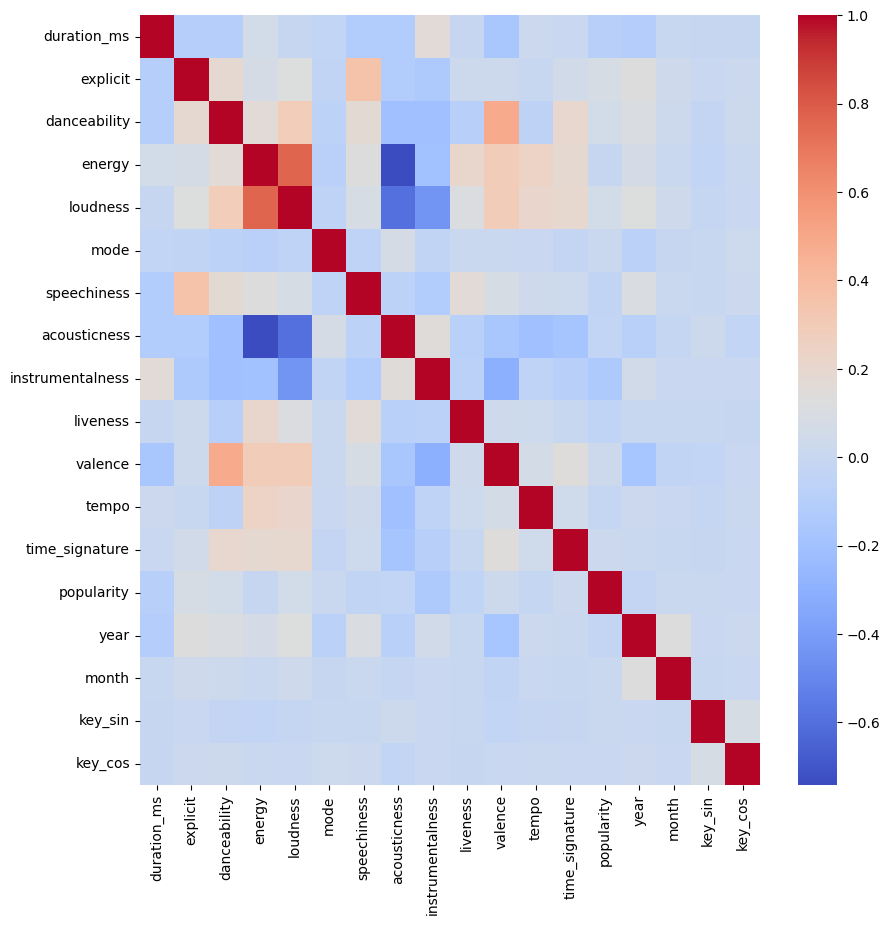

In [259]:
plt.figure(figsize=(10,10))
sns.heatmap(df_w_year_only.corr(), cmap='coolwarm')
plt.show()

In [200]:
def my_tokenizer(text):
    # Split text into tokens based on whitespace characters
    tokens = re.split(r'\s+', text)
    return tokens

In [232]:
df_w_year_only['popularity'] = np.where(df_w_year_only['popularity'] > np.median(y), 1,0)

In [233]:
df_w_year_only['popularity'].value_counts()

0    30985
1    29449
Name: popularity, dtype: int64

In [234]:
bagofwords = CountVectorizer(tokenizer=my_tokenizer).fit(df_w_year_only['track_genre'])

/Users/ounnuqul/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [235]:
transformed = bagofwords.transform(df_w_year_only['track_genre'])

In [236]:
my_df = pd.DataFrame(columns=bagofwords.get_feature_names(), data=transformed.toarray())
display(my_df)

/Users/ounnuqul/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,acoustic,afrobeat,alt-rock,alternative,ambient,anime,black-metal,bluegrass,blues,bossanova,...,summer,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,work-out,world-music
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60429,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
60430,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
60431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
60432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [237]:
full_df = pd.concat([df_w_year_only.reset_index(),my_df],axis=1)

In [239]:
X = full_df.drop(columns='popularity')
y = full_df['popularity']

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,
                                                    stratify=X['track_genre'])

In [242]:
X_train = X_train.drop(columns=['track_id', 'album_name', 'artists', 'track_name', 'track_genre', 'href', 'preview_url'])
X_test = X_test.drop(columns=['track_id', 'album_name', 'artists', 'track_name', 'track_genre', 'href', 'preview_url'])

In [243]:
logit = LogisticRegression(max_iter=100000).fit(X_train, y_train)

In [260]:
logit.score(X_train,y_train)

0.5327982217831564

In [261]:
logit.score(X_test,y_test)

0.5302346570397112

In [262]:
pd.DataFrame(y).value_counts(normalize=True)

popularity
0             0.512708
1             0.487292
dtype: float64

In [248]:
y_pred = logit.predict(X_train)

In [230]:
pd.DataFrame(y_pred).value_counts()

40    17229
30    14576
50     7914
10      635
60      136
dtype: int64

In [249]:
confusion_matrix(y_pred,y_train)

array([[12647, 10771],
       [ 8146,  8926]])

In [263]:
# Genres to Categories Dictionary
genre_categories_dict = {1 : ['acoustic','singer-songwriter','songwriter','folk'],
2 : ['alternative','alt-rock'],
3 : ['ambient','study','sleep','new-age'],
4 : ['brazil','samba','pagode','sertanejo','tango','forro','mpb','bossanova'],
5 : ['british'],
6 : ['classical'],
7 : ['comedy'],
8 : ['country','honky-tonk'],
9 : ['indie','indie-pop'],
10 : ['french'],
11 : ['funk','disco'],
12 : ['gospel'],
13 : ['guitar'],
14 : ['happy','summer','road-trip'],
15 : ['hip-hop','trip-hop','work-out'],
16 : ['dubstep','dub','synth-pop','electro','electronic','breakbeat','industrial','garage','post-dubstep'],
17 : ['progressive-house','house','deep-house','chicago-house','trance','techno','idm','edm','drum-and-bass','party','club','detroit-techno','minimal-techno'],
18 : ['metalcore','metal','death-metal','heavy-metal','black-metal','hardstyle','hardcore','grindcore'],
19 : ['j-dance','dancehall','dance'],
20 : ['j-idol','emo','punk','punk-rock','hard-rock','goth','grunge'],
21 : ['anime','j-rock','j-pop'],
22 : ['k-pop'],
23 : ['jazz','chill','groove','afrobeat','bluegrass'],
24 : ['blues','sad','soul','rainy-day'],
25 : ['kids','disney','children'],
26 : ['latin','latino','reggae','reggaeton','ska'],
27 : ['mandopop'],
28 : ['cantopop'],
29 : ['opera'],
30 : ['piano'],
31 : ['pop','power-pop','pop-film'],
32 : ['psych-rock','rock-n-roll','rock','rockabilly'],
33 : ['r-n-b'],
34 : ['romance'],
35 : ['salsa', 'spanish'],
36 : ['show-tunes','holidays','movies'],
37 : ['world-music','turkish','swedish','iranian','indian','german','malay','philippines-opm']}

In [ ]:
# Forming the track_category column
df['track_category'] = None
for x in genre_categories_dict.keys():
    df['track_category'] = np.where(df['track_genre'].isin(genre_categories_dict[x]), x, df['track_category'])